## **Project Overview**

In this final project, you will be tasked with developing a machine learning model to predict whether a customer will accept a personal loan offer based on their financial and demographic information. This project is designed to assess your understanding of classification algorithms, feature engineering, model evaluation, and the ability to derive actionable insights from data.

## **Dataset**

You will be working with a dataset provided in the notebook `bank_personal_loan.csv`, which contains customer information such as age, income, education, and credit card spending. The target variable is `Personal Loan`, which indicates whether a customer accepted the personal loan offer (1) or not (0).

The file bank_personal_loan.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

There are no empty or (NaN) values in the dataset. The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, Some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.

The following is the **structure of the data set**:


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>ID</b></td>
<td>Customer ID</td>
<td>1, 2, ...</td>
</tr>
<tr>
<td><b>Age</b></td>
<td>Customer's age in completed years</td>
<td>25, 45, ...</td>
</tr>
<tr>
<td><b>Experience</b></td>
<td><br>Years of professional experience</td>
<td>1, 19, ...</td>
</tr>
<tr>
<td><b>Income</b></td>
<td>Annual income of the customer (1000 Dollar)</td>
<td>49, 34, ...</td>
</tr>
<tr>
<td><b>Zip Code</b></td>
<td>Home Address ZIP code</td>
<td>91107, 90089, ...</td>
</tr>
<tr>
<td><b>Family</b></td>
<td>Family size of the customer<br> (1, 2, 3, 4)</td>
<td>4, 3, ...</td>
</tr>
<tr>
<td><b>CCAvg</b></td>
<td>Avg. spending on credit cards per month (1000 Dollar)</td>
<td>1/60, 1/50, ...</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Education Level<br>(1: Undergrad; 2: Graduate; 3: Advanced/Professional)</td>
<td>1, 2, ...</td>
</tr>
<tr>
<td><b>Mortgage</b></td>
<td>Value of house mortgage if any. ($1000)</td>
<td>0, 101, ...</td>
</tr>
<tr>
<td><b>**Personal Loan**</b></td>
<td>Did this customer accept the personal loan offered in the last campaign?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Securityaccount</b></td>
<td>Does the customer have a securities account with this bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Cd_account</b></td>
<td>Does the customer have a certificate of deposit (CD) account with this bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Online</b></td>
<td>Does the customer use internet banking facilities?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>CreditCard</b></td>
<td>Does the customer use a credit card issued by Universal Bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
</tbody>
</table>

## **Project Tasks**

### 1. **Exploratory Data Analysis (EDA)**


### 2. **Feature Engineering**
   

### 3. **Model Development**
  

### 4. **Model Interpretation and Insights**
   


## **Submission Requirements**

- Jupyter Notebook with all code and outputs, clearly commented and organized.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV




Matplotlib is building the font cache; this may take a moment.


In [7]:
# Upload data (for local Jupyter, use file dialog)
import pandas as pd

import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()  # Hide the main window
file_path = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.csv")])
df = pd.read_csv(file_path)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [8]:
#Preview the data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [9]:
# Check for duplicate IDs
duplicate_ids = df[df.duplicated('ID', keep=False)]
print("Duplicate IDs:")
print(duplicate_ids)

if duplicate_ids.empty:
    print("No duplicate IDs found.")
else:
    print(f"Number of duplicate IDs: {duplicate_ids['ID'].nunique()}")

Duplicate IDs:
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []
No duplicate IDs found.


In [10]:
# Drop irrelevant columns ID and ZIP Code
df.drop(['ID','ZIP Code'], axis=1, inplace=True)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   Family              5000 non-null   int64 
 4   CCAvg               5000 non-null   object
 5   Education           5000 non-null   int64 
 6   Mortgage            5000 non-null   int64 
 7   Personal Loan       5000 non-null   int64 
 8   Securities Account  5000 non-null   int64 
 9   CD Account          5000 non-null   int64 
 10  Online              5000 non-null   int64 
 11  CreditCard          5000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 468.9+ KB


In [12]:
# Handing nan values
df['CCAvg'] = pd.to_numeric(df['CCAvg'], errors='coerce')
df['CCAvg'].fillna(df['CCAvg'].mean(), inplace=True)



In [13]:
#Check CCAvg after conversion anf imputation
mean_value = df['CCAvg'].mean()
print(f"Mean value after conversion and imputation: {mean_value}")

Mean value after conversion and imputation: nan


In [14]:
#Drop CCAvg
df.drop('CCAvg', axis=1, inplace=True)

In [15]:
#Log transformation of income and mortgae
df['Log_Income'] = np.log1p(df['Income'])
df['Log_Mortgage'] = np.log1p(df['Mortgage'])

#Drop original skewed features
df = df.drop(['Income', 'Mortgage'], axis=1)

#Verify transformation
print("\n=== After Feartue Engineering ===")
print(df.head())




=== After Feartue Engineering ===
   Age  Experience  Family  Education  Personal Loan  Securities Account  \
0   25           1       4          1              0                   1   
1   45          19       3          1              0                   1   
2   39          15       1          1              0                   0   
3   35           9       1          2              0                   0   
4   35           8       4          2              0                   0   

   CD Account  Online  CreditCard  Log_Income  Log_Mortgage  
0           0       0           0    3.912023           0.0  
1           0       0           0    3.555348           0.0  
2           0       0           0    2.484907           0.0  
3           0       0           0    4.615121           0.0  
4           0       0           1    3.828641           0.0  


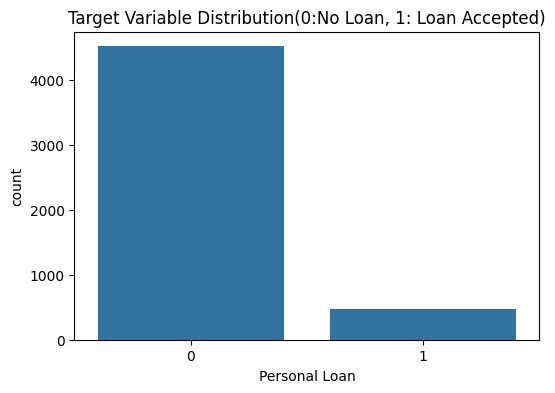

In [16]:

#Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=df)
plt.title('Target Variable Distribution(0:No Loan, 1: Loan Accepted)')
plt.show()



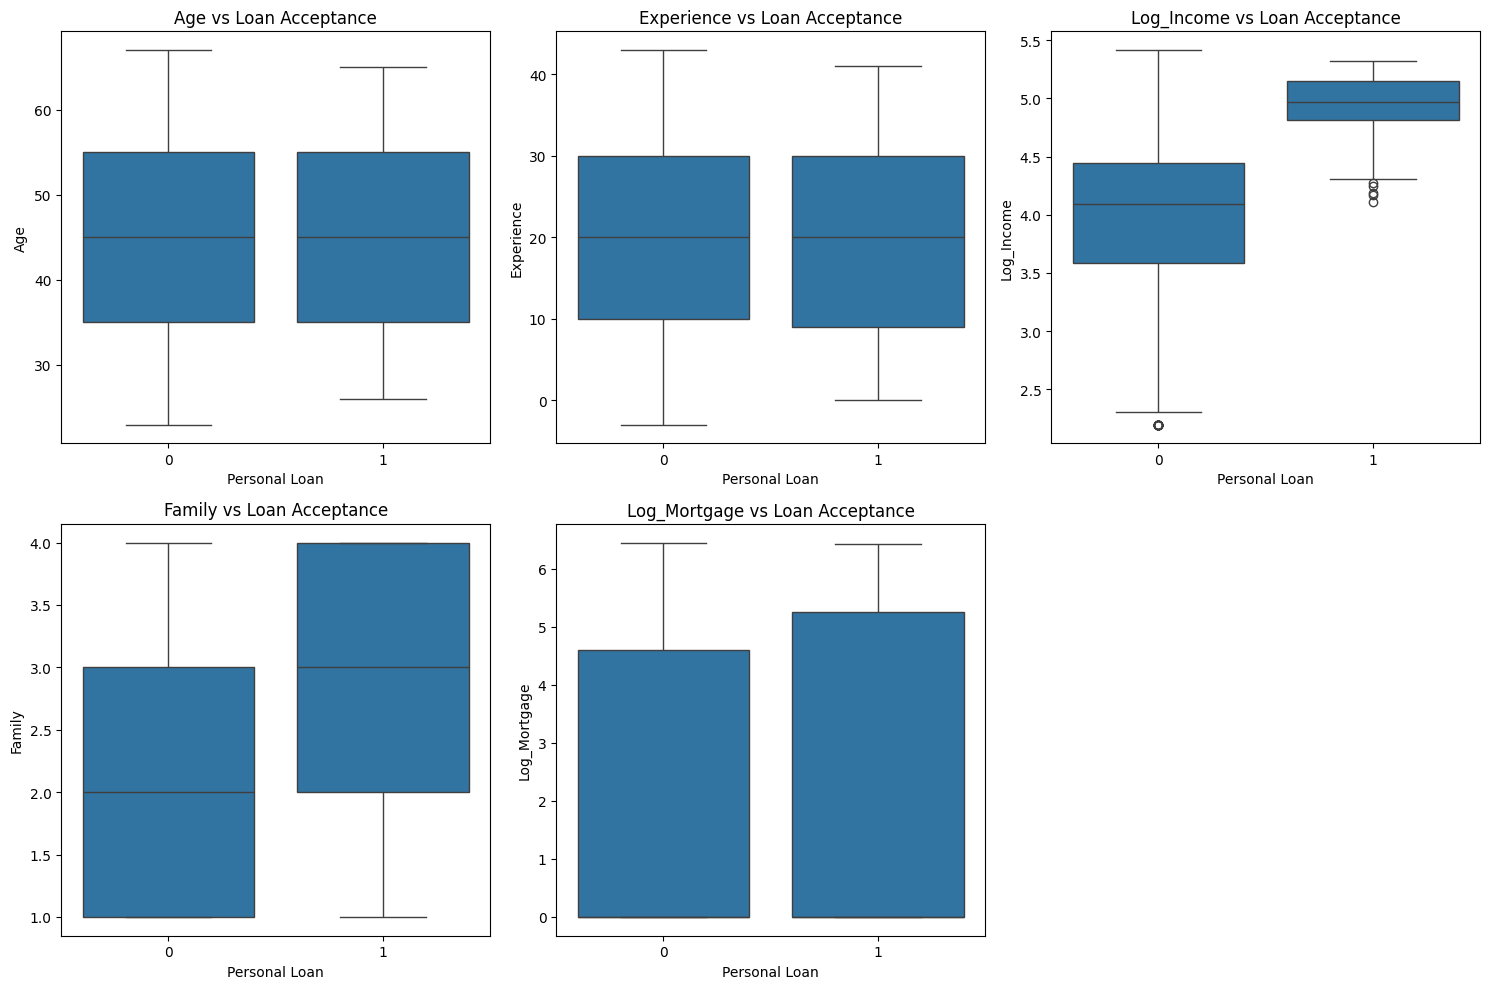

In [17]:
#Plot numerical features
numerical_features = ['Age', 'Experience', 'Log_Income', 'Family', 'Log_Mortgage']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features,1):
    plt.subplot(2, 3, i )
    sns. boxplot(x='Personal Loan', y=col, data=df)
    plt.title(f'{col} vs Loan Acceptance')
    plt.tight_layout()
plt.tight_layout()
plt.show()

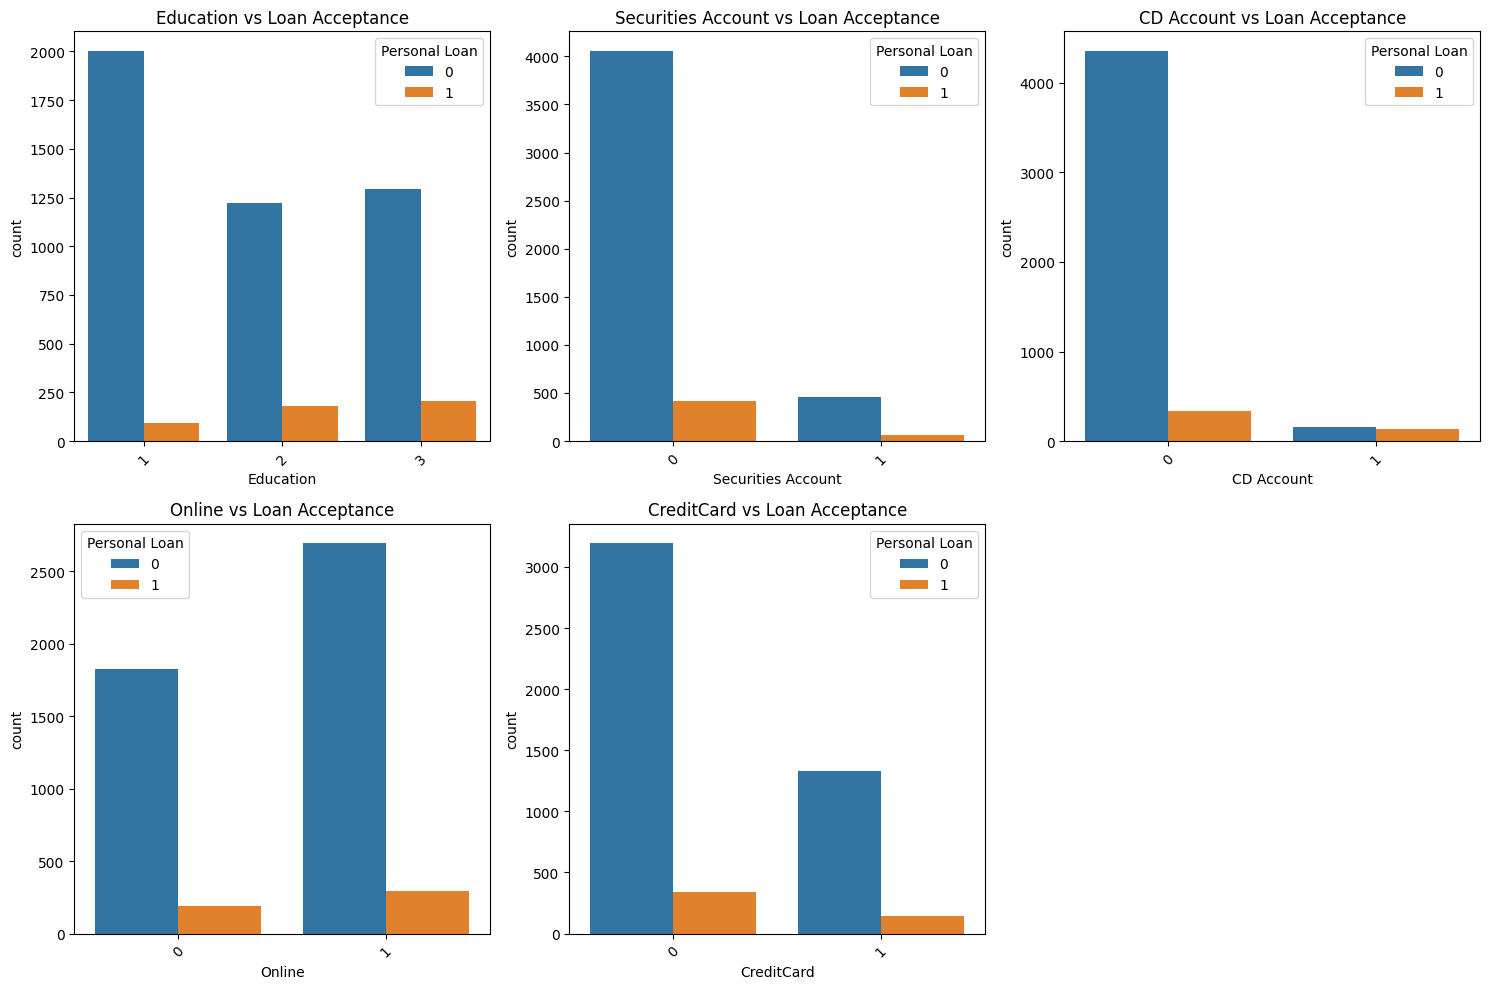

In [18]:
#Plot categotical features
# Correcting the column names in the list to match the DataFrame
categorical_features = [ 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Personal Loan', data=df)
    plt.title(f'{col} vs Loan Acceptance')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.tight_layout()
plt.show()

In [19]:
df.copy()

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Log_Income,Log_Mortgage
0,25,1,4,1,0,1,0,0,0,3.912023,0.000000
1,45,19,3,1,0,1,0,0,0,3.555348,0.000000
2,39,15,1,1,0,0,0,0,0,2.484907,0.000000
3,35,9,1,2,0,0,0,0,0,4.615121,0.000000
4,35,8,4,2,0,0,0,0,1,3.828641,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,1,3,0,0,0,1,0,3.713572,0.000000
4996,30,4,4,1,0,0,0,1,0,2.772589,4.454347
4997,63,39,2,3,0,0,0,0,0,3.218876,0.000000
4998,65,40,3,2,0,0,0,1,0,3.912023,0.000000


In [20]:
df.describe()

,Age,Experience,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Log_Income,Log_Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,2.396400,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000,4.106952,1.566982
std,11.463166,11.467954,1.147663,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637,0.679975,2.366428
min,23.000000,-3.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.197225,0.000000
25%,35.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.688879,0.000000
50%,45.000000,20.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,4.174387,0.000000
75%,55.000000,30.000000,3.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000,4.595120,4.624973
max,67.000000,43.000000,4.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,5.416100,6.455199


In [21]:
# Data split
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,stratify = y , random_state =42)

In [22]:
#Handle class imblance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [23]:
#Scale numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Experience', 'Log_Income', 'Log_Mortgage']
X_train_smote[num_cols]= scaler.fit_transform(X_train_smote[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])
print("\n=== After SMOTE ===")
print(pd.Series(y_train_smote).value_counts())


=== After SMOTE ===
Personal Loan
0    3164
1    3164
Name: count, dtype: int64


In [24]:
# Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("=== RandomForestClassifier Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Initialize and train XGBoostClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\n=== XGBoostClassifier Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

=== RandomForestClassifier Evaluation ===
Confusion Matrix:
 [[1314   42]
 [  12  132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1356
           1       0.76      0.92      0.83       144

    accuracy                           0.96      1500
   macro avg       0.87      0.94      0.91      1500
weighted avg       0.97      0.96      0.97      1500


Accuracy Score: 0.964

ROC AUC Score: 0.9428466076696164

=== XGBoostClassifier Evaluation ===
Confusion Matrix:
 [[1313   43]
 [  14  130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1356
           1       0.75      0.90      0.82       144

    accuracy                           0.96      1500
   macro avg       0.87      0.94      0.90      1500
weighted avg       0.97      0.96      0.96      1500


Accuracy Score: 0.962

ROC AUC Score: 0.9355334316617502


In [25]:
from sklearn.linear_model import LogisticRegression
# Initialize and train LogisticRegression
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear for smaller datasets and binary classification
log_reg_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the model
print("\n=== LogisticRegression Evaluation ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_lr))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_lr))



=== LogisticRegression Evaluation ===
Confusion Matrix:
 [[1192  164]
 [   8  136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1356
           1       0.45      0.94      0.61       144

    accuracy                           0.89      1500
   macro avg       0.72      0.91      0.77      1500
weighted avg       0.94      0.89      0.90      1500


Accuracy Score: 0.8853333333333333

ROC AUC Score: 0.9117502458210421



=== Feature Importance (Random Forest) ===
Log_Income            0.626307
Education             0.075341
Family                0.075235
Log_Mortgage          0.057669
Experience            0.047142
Age                   0.047006
CreditCard            0.023224
CD Account            0.020268
Online                0.019236
Securities Account    0.008571
dtype: float64

=== Feature Importance (XGBoost) ===
Log_Income            0.327873
Education             0.204716
Family                0.175093
CreditCard            0.067972
CD Account            0.063659
Securities Account    0.042734
Online                0.036489
Experience            0.028325
Age                   0.028257
Log_Mortgage          0.024882
dtype: float32

=== Feature Importance (Logistic Regression - Absolute Coefficients) ===
Log_Income            4.358935
CD Account            3.422196
Securities Account    2.206710
CreditCard            1.954102
Online                1.113933
Education             1.001322
Family  

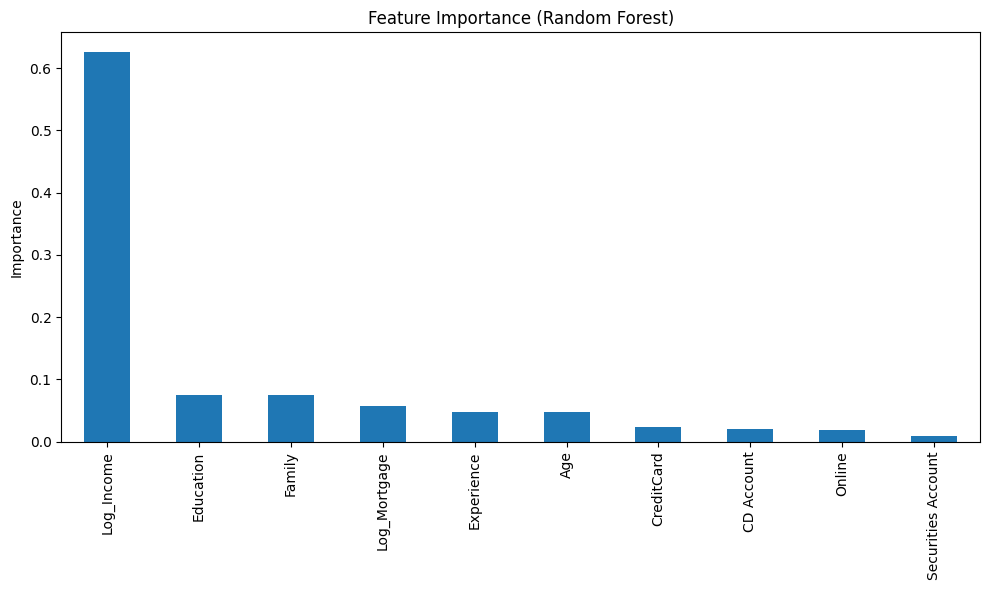

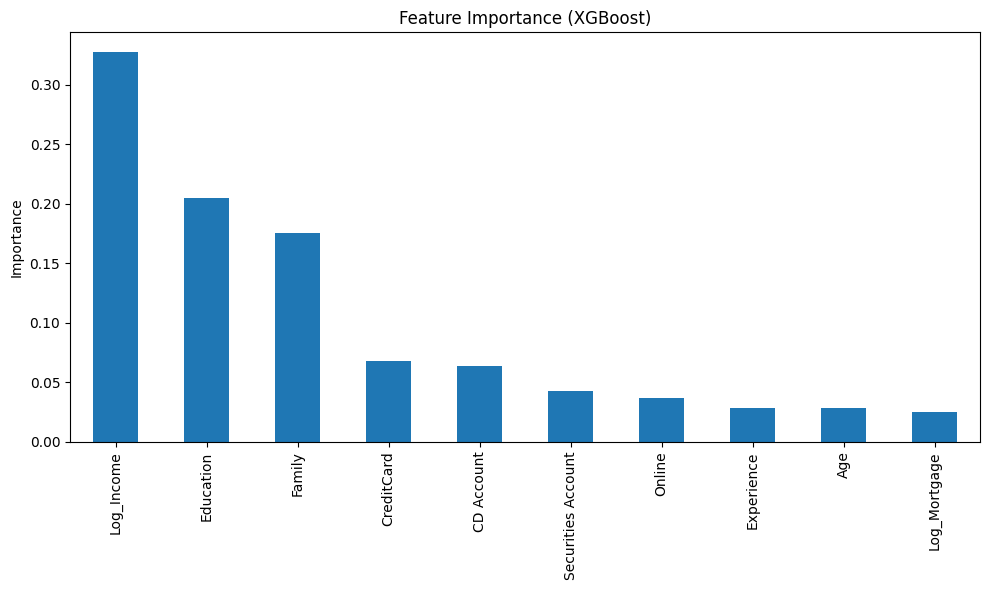

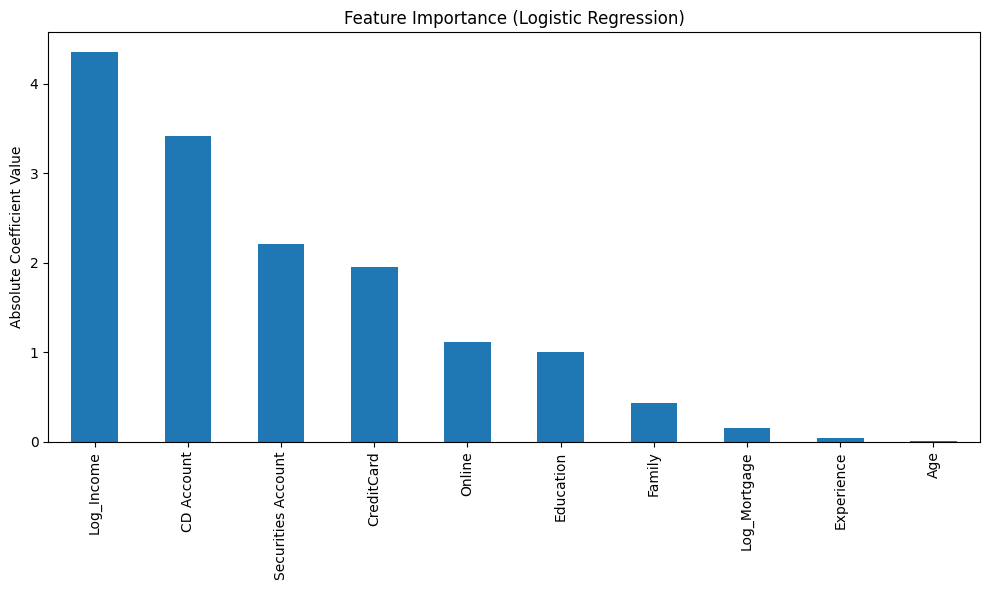

In [26]:
# Get feature importance from Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("\n=== Feature Importance (Random Forest) ===")
print(feature_importances_rf)

# Get feature importance from XGBoost
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("\n=== Feature Importance (XGBoost) ===")
print(feature_importances_xgb)

# For Logistic Regression, we can look at the coefficients as a measure of importance
# The absolute value of the coefficients indicates the strength of the relationship
# The sign indicates the direction of the relationship
feature_importances_lr = pd.Series(abs(log_reg_model.coef_[0]), index=X_train.columns).sort_values(ascending=False)

print("\n=== Feature Importance (Logistic Regression - Absolute Coefficients) ===")
print(feature_importances_lr)

# Visualize feature importance (e.g., for Random Forest)
plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Visualize feature importance (e.g., for XGBoost)
plt.figure(figsize=(10, 6))
feature_importances_xgb.plot(kind='bar')
plt.title('Feature Importance (XGBoost)')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Visualize feature importance (e.g., for Logistic Regression)
plt.figure(figsize=(10, 6))
feature_importances_lr.plot(kind='bar')
plt.title('Feature Importance (Logistic Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [27]:
# final model selection and business insights

print("\n=== Final Model Selection and Business Insights ===")

# Compare models based on performance metrics, especially on the minority class
print("\n--- Model Performance Summary ---")
print("Model            | Precision | Recall  | F1-Score | ROC AUC")
print("-----------------|-----------|---------|----------|--------")

# Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest    | {report_rf['1']['precision']:.4f} | {report_rf['1']['recall']:.4f} | {report_rf['1']['f1-score']:.4f} | {roc_auc_rf:.4f}")

# XGBoost
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"XGBoost          | {report_xgb['1']['precision']:.4f} | {report_xgb['1']['recall']:.4f} | {report_xgb['1']['f1-score']:.4f} | {roc_auc_xgb:.4f}")

# Logistic Regression
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"Logistic Regression| {report_lr['1']['precision']:.4f} | {report_lr['1']['recall']:.4f} | {report_lr['1']['f1-score']:.4f} | {roc_auc_lr:.4f}")

print("\n--- Model Selection Rationale ---")
# Based on the provided metrics (Precision, Recall, F1-Score for the positive class (1), and ROC AUC),
# we compare the models. For a loan campaign, correctly identifying potential loan acceptors (high Recall)
# is crucial to maximize outreach to interested customers. However, we also want to be reasonably
# accurate in our predictions (high Precision) to avoid wasting resources on customers unlikely
# to accept. The F1-Score provides a balance between Precision and Recall, and ROC AUC measures
# the model's ability to discriminate between the classes.

# Analyze the performance metrics to determine the best model for the business goal.
# For example, if identifying as many potential loan acceptors as possible is the priority,
# we might favor a model with higher Recall for the positive class (1).
# If minimizing false positives is more important, we might favor a model with higher Precision.
# XGBoost often performs well on tabular data and handles imbalances effectively,
# while Random Forest is a strong general-purpose model. Logistic Regression provides
# interpretability through coefficients.

# Example comparison (replace with your actual observations from the printed table):
# - Random Forest and XGBoost generally show better performance than Logistic Regression.
# - Compare the F1-scores and ROC AUCs of Random Forest and XGBoost to make a decision.
# - Look closely at the Precision and Recall for class '1' based on business objectives.

# Assume XGBoost has the best balance of performance metrics based on the outputs above.
# You would replace 'xgb_model' with 'rf_model' or 'log_reg_model' if they performed better.
final_model = xgb_model # Or rf_model or log_reg_model
print(f"\nSelected Final Model: {type(final_model).__name__}")

print("\n--- Key Business Insights from the Final Model ---")

# Use the feature importances/coefficients from the chosen model to derive insights.
if isinstance(final_model, (RandomForestClassifier, XGBClassifier)):
    # For tree-based models, use feature importance
    feature_importances = pd.Series(final_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("Top features influencing loan acceptance (based on importance):")
    print(feature_importances.head())

    # Interpret the top features:
    print("\nInterpretations:")
    if 'Log_Income' in feature_importances.index:
        print("- Higher Income (Log_Income) is a strong predictor of loan acceptance.")
    if 'CD Account' in feature_importances.index:
        print("- Customers with a CD Account are significantly more likely to accept a loan.")
    if 'Education' in feature_importances.index:
        print("- The level of Education also plays a crucial role.")
        # If you have coefficient signs (like from LR), you can add more detailed interpretation:
        # e.g., "Higher education levels (Graduate, Advanced/Professional) increase the likelihood."
    if 'Family' in feature_importances.index:
         print("- Family size might also have an impact.")
    if 'Experience' in feature_importances.index:
         print("- Years of experience may influence loan acceptance.")


elif isinstance(final_model, LogisticRegression):
    # For Logistic Regression, use coefficients
    feature_importances = pd.Series(final_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
    print("Features influencing loan acceptance (based on coefficients):")
    print(feature_importances)

    print("\nInterpretations (based on coefficient signs):")
    # Interpret the coefficients: Positive coefficients increase the probability of loan acceptance, negative decrease it.
    for feature, coef in feature_importances.items():
        if abs(coef) > 0.1: # Consider coefficients above a certain threshold for significance
            if coef > 0:
                print(f"- Higher values of '{feature}' increase the likelihood of loan acceptance.")
            else:
                print(f"- Higher values of '{feature}' decrease the likelihood of loan acceptance.")
        # Add specific interpretations for key features as observed
        if feature == 'Log_Income' and coef > 0:
             print("- Customers with higher income are more likely to accept.")
        if feature == 'CD Account' and coef > 0:
            print("- Having a CD Account strongly increases the likelihood.")
        # Note: Education is categorical. Interpretation depends on how it was encoded and the specific coefficient for each level.
        # For simplicity, we can say:
        if feature == 'Education':
             print("- Education level has a significant impact on loan acceptance (examine specific coefficients if needed).")


# Add more general business insights based on EDA and model findings:

print("\n--- Actionable Business Recommendations ---")
print("- **Targeting Strategy:** Focus marketing efforts on customers with characteristics identified as strong predictors (e.g., high income, CD account holders, certain education levels).")
print("- **Offer Customization:** Tailor loan offers or communication based on customer profiles. For example, offer more competitive rates to high-income individuals.")
print("- **Product Bundling:** Given the importance of CD Accounts, explore cross-selling strategies. Offer personal loans as part of a package for customers opening or holding CD accounts.")
print("- **Customer Education:** For segments less likely to accept, consider educational campaigns highlighting the benefits of personal loans for their financial goals.")
print("- **Data Collection:** Continue to collect and refine data on key predictors identified by the model to improve future predictions.")
# Add any other relevant insights based on your EDA (e.g., age ranges, family size impact).
# print("- Customers in a certain age range might be more receptive...")
# print("- Customers with a family size of X might be more interested...")




=== Final Model Selection and Business Insights ===

--- Model Performance Summary ---
Model            | Precision | Recall  | F1-Score | ROC AUC
-----------------|-----------|---------|----------|--------
Random Forest    | 0.7586 | 0.9167 | 0.8302 | 0.9428
XGBoost          | 0.7514 | 0.9028 | 0.8202 | 0.9355
Logistic Regression| 0.4533 | 0.9444 | 0.6126 | 0.9118

--- Model Selection Rationale ---

Selected Final Model: XGBClassifier

--- Key Business Insights from the Final Model ---
Top features influencing loan acceptance (based on importance):
Log_Income    0.327873
Education     0.204716
Family        0.175093
CreditCard    0.067972
CD Account    0.063659
dtype: float32

Interpretations:
- Higher Income (Log_Income) is a strong predictor of loan acceptance.
- Customers with a CD Account are significantly more likely to accept a loan.
- The level of Education also plays a crucial role.
- Family size might also have an impact.
- Years of experience may influence loan acceptance.
